In [15]:
import pandas as pd
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats

In [16]:
df = pd.read_csv('data_model.csv', index_col = 0)
df.sample(5)

,T1,F1,F2,F3,F4,F5,F6,T2,T3,F7,F8,F9,F10
454.0,2.971155,2098.475039,6.954195,76.238582,22.571862,230.635311,6.308489,71.844822,2355.323234,281.413769,0.0,9.337655,48.015465
263.0,3.134842,1982.011195,6.703952,91.493812,22.912466,268.503875,6.692253,73.097493,2186.781209,199.311995,0.0,10.199198,60.631701
486.0,3.290879,2037.898856,6.556227,87.067519,20.746711,335.026336,5.922160,72.039053,2232.096572,206.981036,0.0,6.505182,59.304158
509.0,3.916760,2127.026037,6.958384,102.789010,18.733329,262.873763,2.740644,77.793395,2083.176977,303.094659,0.0,12.678927,51.079334
371.0,2.488009,2015.679146,6.503939,124.554647,24.655512,344.992000,5.803324,70.701845,2190.631608,244.314996,0.0,2.786071,70.922716


In [19]:
rp.codebook(df['T3'])

Variable: T3    Data Type: float64 

 Number of Obs.: 1000 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 982 

 Range: [1143.21033409802, 3725.19076007351] 
 Mean: 2461.36 
 Standard Deviation: 471.16 
 Mode: 3000.0 
 10th Percentile: 1865.4714950989571 
 25th Percentile: 2135.8860861823973 
 50th Percentile: 2455.9744618562454 
 75th Percentile: 2755.169485470553 
 90th Percentile: 3059.43221463231 







In [20]:
rp.summary_cont(df.groupby(["F8"])["T3"])

,N,Mean,SD,SE,95% Conf.,Interval
F8,,,,,,
0.0,502,2451.0098,468.6246,20.9157,2409.9164,2492.1032
1.0,498,2471.7912,473.9542,21.2384,2430.0631,2513.5193


In [21]:
import statsmodels.formula.api as smf

In [23]:
model = smf.mixedlm("T3 + C('F7') + C('F8')",
                    df,
                    groups= "F8").fit()

model.summary()

PatsyError: Number of rows mismatch between data argument and C('F7') (1000 versus 1)
    T3 + C('F7') + C('F8')
         ^^^^^^^

In [11]:
X, y = df.iloc[:, : -1].values, df.iloc[:, 0].values


In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

ValueError: x and y must be the same size

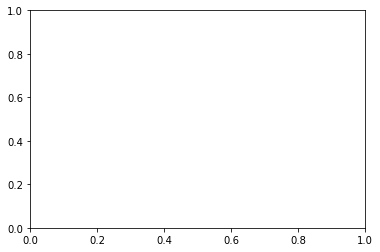

In [13]:
plt.scatter(X,y, color='red')
plt.plot(X, lr.predict(X),color='blue')
plt.title("Linear")
plt.xlabel('F1')
plt.ylabel('T3')
plt.show()